 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [ ]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

display(Image(generic_image))

In [ ]:
class Video: 
    def __init__(self):
        self.title = ""
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now Playing {self.title}")
        display(Image(self.link))
    
    def pause(self):
        print("Video Paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."

In [ ]:
vid = Video()
vid.title = "Cool Video"
print(vid)
vid.play()


## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [ ]:
class Movie(Video):
    pass
class Commercial(Video):
    
    def pause(self):
        return 'this action is unavailable'

In [ ]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data["number"]
        self.season = data["season"]
        self.date_aired = data["airdate"]
        self.summary = data["summary"]
        self.rating = data["rating"]["average"]
        self.length = timedelta(minutes = data["runtime"])
        self.title = data["name"]
        if data["image"]:
            self.link = data["image"]["medium"]
        
        

In [ ]:
ep1 = Episode()

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [ ]:
class Series:
    def __init__(self):
        self.id = None
        self.network =  None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query=""):
        data = None
        while not data:
            if not query:
                query = input("What is the name of the series? ")
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series Error: status code{r.status_code}")
                query = ""
        
        # use data to fill attributes
        self.id = data["id"]
        self.title = data["name"]
        self.genres = data["genres"]
        self.summary = data["summary"]
        if data["network"]:
            self.network = data["network"]["name"]
        else:
            self.network = data["webChannel"]["name"]
            
        #API Call for episodes:
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: status code {r.status_code}")
            return
        
        self.seasons = episodes[-1]["season"]
        self.episodes = [Episode(ep) for ep in  episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
        
    def play(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? (Y/N)")
                if watching.lower().strip() not in ("yes","y"):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"

In [ ]:
first_show = Series()
first_show.get_info()

Now Playing Taking the Leap


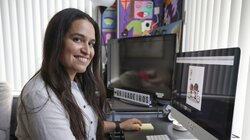

Now Playing Going All In


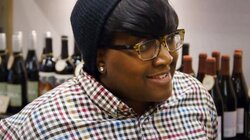

Now Playing Easier Said Than Done


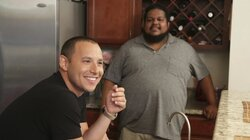

Are you still watching? (Y/N)n


In [88]:
first_show.play()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [148]:
len(first_show)

0

In [149]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    
    #add_user
    def add_user(self, name = ""):
        if not name:
            name = input("What is the name of your new user?")
        self.users.append(name)
        self.choose_user()
    
    #choose_user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a user.")
                 
    #add_to_watch_list
    def add_to_watch_list(self,query=""):
            show = Series()
            show.get_info(query)
            self.watch_list.append(show)
            print(f"{show.title} has been added to the watchlist.")
    
       #clear_watch_list
    def clear_watch_list(self):
        clear_list = input("Are you ABSOLUTELY sure you want to clear your watchlist? Y/N")
        if clear_list in ("yes","y"):
            self.watch_list.clear()
            print(f"{self.current_user}, your watchlist has been cleared!")  
            return
        else:
            return
            
            
    #choose_from_watch_list
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\n\nSummary: \n{series.summary}")
            display(Image(series.episodes[0].link))
        
        watch = input("What do you want to watch? ")
        
        if watch.lower() in list(map( lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play()
        else:
            response = input(f"{watch} is not in your watchlist. Would you like to add it? Y/N ")
            if response in ("yes","y"):
                self.add_to_watch_list(watch)
                self.watch_list[-1].play()   
    
    #run
    def run(self):
        """
        Method allowing users to choose a series and play episodes.
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from  your watchlist
            Remove - Remove something from your watchlist
            Add    - Add a new user
            Quit   - Close the app 
            
        """)
        
        while True:
            response = input("What would you like to do ( search, watch, add, clear, quit)")
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "clear":
                self.clear_watch_list()
            elif response.lower() == "quit":
                print(f"Thanks for watching, {self.current_user}!")
            else:
                print("Incorrect input... Try again.")
    

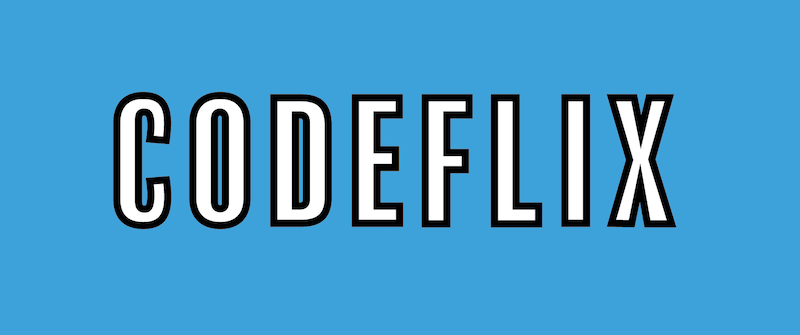

Create a profile: Dannika
Users: 
Dannika
Choose a user: Dannika
Dannika

            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from  your watchlist
            Remove - Remove something from your watchlist
            Add    - Add a new user
            Quit   - Close the app 
            
        
What would you like to do ( search, watch, add, clear, quit)search
What is the name of the series? friends
Friends has 236 episodes.
Friends has been added to the watchlist.
What would you like to do ( search, watch, add, clear, quit)Schitt's Creek
Incorrect input... Try again.
What would you like to do ( search, watch, add, clear, quit)search
What is the name of the series? Schitt's Creek
Schitt's Creek has 79 episodes.
Schitt's Creek has been added to the watchlist.
What would you like to do ( search, watch, add, clear, quit)watch


Title: Friends | Episodes: 236


Summary: 
<p>Six young (20-something) people from New

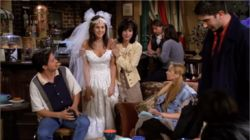



Title: Schitt's Creek | Episodes: 79


Summary: 
<p><b>Schitt's Creek</b> centers on a formerly filthy rich video store magnate Johnny Rose, his soap star wife Moira, and their two kids, über-hipster son David and socialite daughter Alexis, who suddenly find themselves broke. They are forced to live in Schitt's Creek, a small depressing town they once bought as a joke.</p>


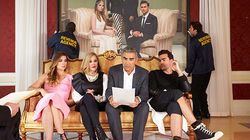

What do you want to watch? Schitt's Creek
Now Playing Our Cup Runneth Over


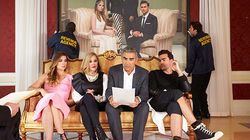

Now Playing The Drip


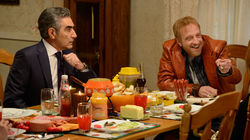

Now Playing Don't Worry, It's His Sister


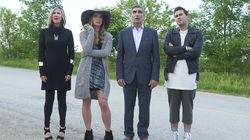

Are you still watching? (Y/N)n
What would you like to do ( search, watch, add, clear, quit)clear
Are you sure you want to clear your watchlist? Y/Ny
Dannika, your watchlist has been cleared!
What would you like to do ( search, watch, add, clear, quit)watch
What do you want to watch? friends
friends is not in your watchlist. Would you like to add it? Y/N y
Friends has 236 episodes.
Friends has been added to the watchlist.
Now Playing The One Where Monica Gets a Roommate


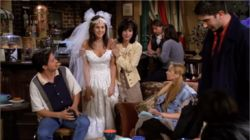

Now Playing The One With the Sonogram at the End


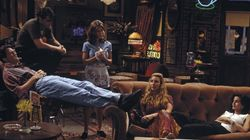

Now Playing The One With the Thumb


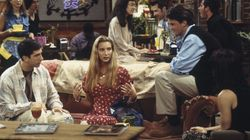

Are you still watching? (Y/N)n
What would you like to do ( search, watch, add, clear, quit)quit
Thanks for watching, Dannika!


In [ ]:
codeflix = Theater()
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [ ]:
# IDEAS: filter through watchlist by genre # remove show from watchlist 

In [ ]:
#note: could NOT get it to recognize any input as a show in the watchlist. maybe had to import from API. 
#got it to clear the whole list, instead, for now. here is the code i attempted:

# def remove_from_watch_list(self,query=""):
        #remove_response = input("Which show would you like to remove?")
        #if remove_response in self.watch_list:
            #self.watch_list.pop([remove_response])
            #print(f"{remove_response} has been removed!")
            #return 
        #else:
            #print(f"{remove_response} is not in your watchlist... Please try a valid entry.")   